# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
tabela

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

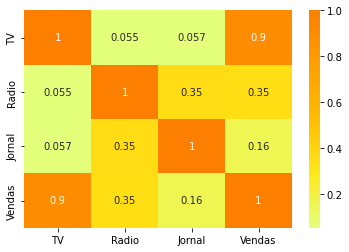

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

#display(tabela.corr())

#criar o gráfico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

#exibir o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [38]:
# y -> quem você quer prever
# x -> o resto (quem você vai usar pra fazer a previsão)

x = tabela[["TV", "Radio", "Jornal"]]
y = tabela.Vendas

from sklearn.model_selection import train_test_split

# separando a base de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cria IA
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()

# Treina IA
linear_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [40]:
#fazer previsão dos testes

linear_prevision = linear_model.predict(x_test)
random_forest_prevision = random_forest_model.predict(x_test)

from sklearn.metrics import r2_score

print("regressão linear: " + str(r2_score(y_test, linear_prevision) * 100) + "%")
print("árvore de decisão: " + str(r2_score(y_test, random_forest_prevision)*100) + "%")

regressão linear: 87.43892312158614%
árvore de decisão: 94.22997364838923%


#### Visualização Gráfica das Previsões

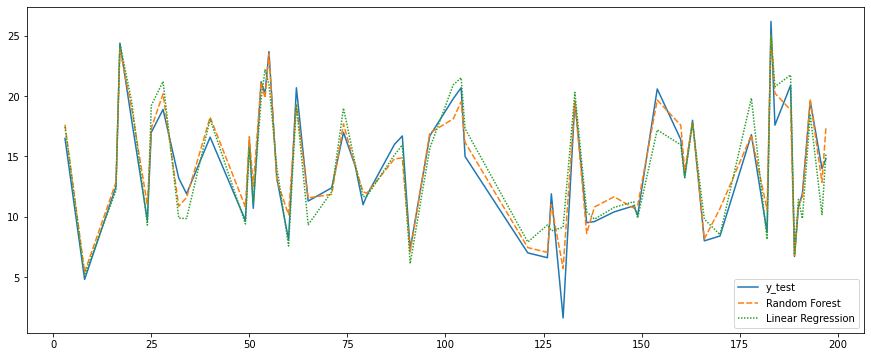

In [43]:
tabela_aux = pd.DataFrame()
tabela_aux["y_test"] = y_test
tabela_aux["Random Forest"] = random_forest_prevision
tabela_aux["Linear Regression"] = linear_prevision

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_aux)
plt.show()

#### Como fazer uma nova previsão?

In [45]:
# melhor modelo -> Arvore de decisão

novos = pd.read_csv("novos.csv")
novos

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [47]:
#previsão com os novos valores
random_forest_model.predict(novos)

array([ 7.42 , 10.096, 19.742])